In [0]:
import random # gerador de números aleatórios
import numpy as np # biblioteca Numpy para manipulação de Matrizes
import pandas as pd # biblioteca Pandas é usada para manipulação de Tabelas
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

from sklearn.preprocessing import StandardScaler # modulo para padronizar os dados
from sklearn.preprocessing import MinMaxScaler # modulo para normalizar os dados
from sklearn.decomposition import PCA # modulo para aplicar PCA nos dados

random.seed(1) 

## 1) Para os dados da iris com erros, após remover as linhas contendo NaN e '?', quantas observações sobraram?

In [0]:
df = pd.read_csv('data/iris-with-errors.csv')

df = df.replace('?', np.nan)
df = df.dropna()
n_rows = len(df)

print(f'Resposta: {n_rows}')

Resposta: 19


## 2) Usando a distância interquantil e o critério de que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot, quantos outliers há nos dados da Iris? (Veja o exemplo da aula)

In [0]:
def detecta_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    matches = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))
    return df[matches.any(1)]

In [0]:
iris = pd.read_csv('data/iris.csv')
n_outliers_iris = len(detecta_outliers(iris))

print(f'Resposta: {n_outliers_iris}')

Resposta: 4


## 3) Usando a distância interquantil e o critério de que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot, quantos outliers há nos dados BostonHouse?

In [0]:
boston = pd.read_csv('data/BostonHousing.csv')
n_outliers_boston = len(detecta_outliers(boston))

print(f'Resposta: {n_outliers_boston}')

Resposta: 238


## 4) Quantas variáveis são necessárias para se explicar ao menos 90% da variância nos dados Vehicle?

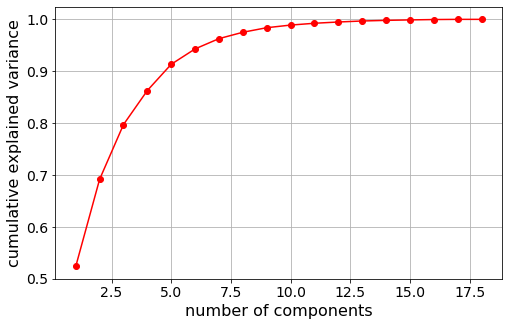

Resposta: 5


In [0]:
vehicle = pd.read_csv('data/Vehicle.csv')

# Utilizamos somente as variaveis e não o target no PCA
X_vehicle = vehicle.drop(columns='Class')

# Podemos reduzir a dimensionalidade para qualquer valor abaixo da quantidade de features que temos
# Portanto, criamos uma lista com todas possibilidades para analizarmos qual é o minimo
# dimensoes que podemos reduzir ainda sendo possivel explicar sua variancia
n_components_values = np.arange(1, len(X_vehicle.columns) + 1)

# Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.
X_vehicle_standarized = StandardScaler().fit_transform(X_vehicle)

# Instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(X_vehicle_standarized)

# Mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas 5 variaveis, conseguimos explicar 90% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=16)
plt.ylabel('cumulative explained variance', fontsize=16);
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)
plt.grid(True)
plt.show(True)

cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
n_variables = np.argmax(cumsum_variance > 0.90) + 1

print(f'Resposta: {n_variables}')

## 5) Quantas variáveis são necessárias para se explicar ao menos 80% da variância nos dados BostonHousing?

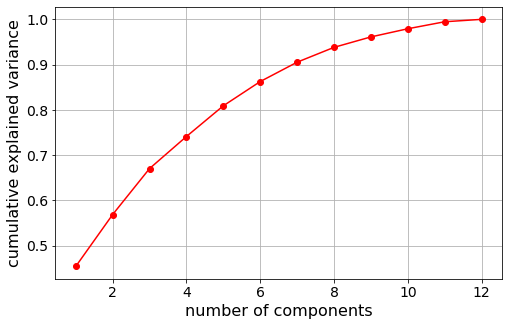

Resposta: 5


In [0]:
boston = pd.read_csv('data/BostonHousing.csv')

# Neste dataset, tanto a variavel nox quanto medv 
# podem ser usadas em tarefas preditivas[1], e como isso nao foi especificado,
# todo o conjunto de dados pode ser é usado ou eliminar ambas das variaveis.
# Em ambos dos casos retornaria a mesma resposta para o PCA
# [1] https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
X_boston = boston.drop(columns=['nox','medv'])

# Podemos reduzir a dimensionalidade para qualquer valor abaixo da quantidade de features que temos
# Portanto, criamos uma lista com todas possibilidades para analizarmos qual é o minimo
# dimensoes que podemos reduzir ainda sendo possivel explicar sua variancia
n_components_values = np.arange(1, len(X_boston.columns) + 1)

# Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.
X_boston_standarized = StandardScaler().fit_transform(X_boston)

# Instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(X_boston_standarized)

# Mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas 5 variaveis, conseguimos explicar 80% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=16)
plt.ylabel('cumulative explained variance', fontsize=16);
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)
plt.grid(True)
plt.show(True)

cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
n_variables = np.argmax(cumsum_variance > 0.80) + 1

print(f'Resposta: {n_variables}')